<a href="https://colab.research.google.com/github/nidheesh-p/AI-Learning/blob/master/Build_First_Ai_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Your First AI Agent**

### 🤖 **Rule based Agent**

First we'll build a **simple rule-based AI agent** — a chatbot that responds to user inputs based on predefined rules.

This is your first step toward understanding how AI agents work. Unlike machine learning models, rule-based agents follow **if-then** logic to make decisions.

By the end of this part, you will:
- Understand what a rule-based system is
- Build a chatbot that can respond to basic inputs
- See where rule-based agents fall short

#### 🧩 **What is a Rule-Based Agent?**

A **rule-based agent** operates on hard-coded rules. These rules define what the system should do when it encounters specific input.

For example:

- If someone says "hello", respond with "Hi there!"
- If someone asks for your name, respond with "I'm a chatbot!"

This type of system does **not learn** or adapt — it's predictable and easy to implement, but not flexible.

You'll now create your first rule-based chatbot below.


In [1]:
# 🔧 Rule-based chatbot function

def rule_based_chatbot(user_input):
    user_input = user_input.lower()

    if "hello" in user_input or "hi" in user_input:
        return "Hello! How can I assist you today?"
    elif "your name" in user_input:
        return "I'm a simple rule-based chatbot."
    elif "weather" in user_input:
        return "I can't provide live weather updates, but it's a nice day to code!"
    elif "bye" in user_input or "goodbye" in user_input:
        return "Goodbye! Have a great day."
    else:
        return "I'm not sure how to respond to that. Can you try rephrasing?"

#####💡 **Try it!**

Type something like:
- "Hi"
- "What's your name?"
- "Tell me the weather"
- "Bye"

To exit the chatbot, type `exit`.

Think about:
- What happens when you ask something unexpected?
- Can you add more rules to improve it?


In [2]:
# 🔁 Run a loop to chat with the bot
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Session ended.")
        break
    response = rule_based_chatbot(user_input)
    print("Chatbot:", response)

You: hi
Chatbot: Hello! How can I assist you today?
You: how are you
Chatbot: I'm not sure how to respond to that. Can you try rephrasing?
You: weather
Chatbot: I can't provide live weather updates, but it's a nice day to code!
You: whats your name
Chatbot: I'm a simple rule-based chatbot.
You: help me book a flight
Chatbot: I'm not sure how to respond to that. Can you try rephrasing?
You: exit
Chatbot: Session ended.


#### 🚧 **Limitations of Rule-Based Agents**

While rule-based systems are easy to build and understand, they come with significant limitations:

- ❌ Not scalable: You need to write a rule for every possible input
- ❌ No learning: Can't improve or adapt on its own
- ❌ Poor at handling ambiguous or fuzzy input (e.g., typos, synonyms)

This is where **LLM-based agents** like ChatGPT and LangChain agents shine.

In the next section, you'll learn to build agents that use **language models** to reason and act intelligently.


### 🧠 **Simple LLM Powered Chatbot**

In this part, you'll create a chatbot using **Google's Gemini LLM**.

It will:
- Take user input
- Use `gemini-2.0-flash
` model to generate responses
- Act as a simple conversational agent

Let's start!


In [3]:
# Install the Google Generative AI SDK
!pip install -qU google-generativeai

##### Securely Enter Your API Key

To use Gemini (Google's large language model), you'll need an API key from Google AI Studio.

👉 [Click here to get your key](https://aistudio.google.com/app/apikey)

1. Sign in with your Google account
2. Click “Create API Key”
3. Copy the key (you’ll use it below)

In [47]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
print(f"{GOOGLE_API_KEY[:10]} ...")

TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')
print(f"{TAVILY_API_KEY} ...")

# SERPAPI_KEY = userdata.get('SERPAPI_KEY')
# print(f"{SERPAPI_KEY[:10]} ...")

AIzaSyDiHv ...
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 ...


In [5]:
import getpass
import google.generativeai as genai
import os
# Securely input the Gemini API key
# GOOGLE_API_KEY = getpass.getpass("Enter your Gemini API key: ")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
# Configure the Generative AI client
genai.configure(api_key=GOOGLE_API_KEY)

##### Initialize the Gemini Chat Model

In [6]:
# Load the Gemini Pro model for chat
model = genai.GenerativeModel("gemini-2.0-flash")

# Start a chat session (enables memory across turns)
chat = model.start_chat()

##### Define a Chat Function

In [7]:
def chat_with_gemini(user_input):
    response = chat.send_message(user_input)
    return response.text

##### Chat with the Bot

In [8]:
print("🤖 Gemini Chatbot Ready! Type 'exit' to quit.\n")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Bot: Goodbye!")
        break
    reply = chat_with_gemini(user_input)
    print("Bot:", reply)

🤖 Gemini Chatbot Ready! Type 'exit' to quit.

You: whats the weather today
Bot: Okay, I can help with that! To give you the most accurate weather forecast, I need to know your location. Could you please tell me your city and state (or zip code)?

You: SF
Bot: Okay! For San Francisco, CA, the weather today is:

*   **Temperature:** Expect mostly cloudy skies, with a high near 61°F (16°C) and a low around 51°F (11°C).
*   **Wind:** Northwest winds around 14 mph.
*   **Chance of Rain:** There is a low chance of rain today, around 20%.


You: whats todays date
Bot: Today is October 26, 2023.

You: eixt
Bot: Okay, I understand you want to exit. Since I'm a text-based AI, there's nothing for me to actually "close." You can simply close the browser tab or window you're using to chat with me, or just stop sending messages.

Is there anything else I can help you with before you go?

You: exit
Bot: Goodbye!


### 🩺 **Medical RAG-Based AI Agent with Web Search**

#####📌 **Business Problem**
In today's digital healthcare landscape, patients and medical professionals frequently seek accurate, up-to-date answers to a wide range of medical questions. However:

- Search engines return too much noise or unverified sources.

- Chatbots often hallucinate or give generic advice without referencing valid information.

- Medical professionals/Patients have limited time to find contextually relevant evidence or literature.

There is a growing need for an AI system that can:

- Provide precise, evidence-backed answers,

- Maintain context awareness during multi-turn conversations,

- And optionally enhance its knowledge using trusted real-time web sources.

##### 🎯 **Objectives**
This project aims to build a Retrieval-Augmented Generation (RAG)-based Medical Assistant chatbot that:

✅ Answers healthcare-related questions accurately using an internal medical dataset

✅ Retrieves relevant information from a ChromaDB vector store

✅ Optionally fetches real-time results via the Tavily web search API

✅ Maintains conversation context and memory using LangChain

##### **1. Setup and Prerequisites**
    
Before we start building, make sure you have all the necessary libraries and tools set up.

Required Libraries:

- Langchain: For building the RAG system and interacting with models.

- Google Generative AI: For embedding generation and leveraging LLMs.

- Tavily API: For web search capabilities.

- Chroma: For storing and querying embeddings efficiently.
    
Run this cell to install dependencies.

In [9]:
!pip install -q langchain google-generativeai langchain-google-genai langchain_community chromadb pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 5.5 MB/s eta 0:00:

##### **2. Data Loading and Preprocessing**
Here, we’ll load the medical data that our chatbot will refer to when answering queries. We will use a CSV file containing descriptions, patient, and doctor information to create a single document per entry.

**Explanation**
We're combining the Description, Patient, and Doctor columns into a single string for each row. This combined string becomes the core document that will be used for embedding.

In [10]:
import pandas as pd


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# df = pd.read_csv(r"/content/drive/MyDrive/Datasets/ai-medical-chatbot.csv")

In [11]:
!gdown 1FpC7_DaxWQJf4JoVQLlbSYcSTZSz86C6
df = pd.read_csv(r"ai-medical-chatbot.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1FpC7_DaxWQJf4JoVQLlbSYcSTZSz86C6
From (redirected): https://drive.google.com/uc?id=1FpC7_DaxWQJf4JoVQLlbSYcSTZSz86C6&confirm=t&uuid=d4907cbb-f1dc-4071-9cdb-bf262045f256
To: /content/ai-medical-chatbot.csv
100% 267M/267M [00:04<00:00, 61.0MB/s]


In [12]:
df.head()

,Description,Patient,Doctor
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...


In [13]:
df.count()

,0
Description,256916
Patient,256916
Doctor,256916


###### 🧾 **Dataset Description**

The dataset used in this project consists of real-world medical Q&A data sourced from an online medical consultation platform. It simulates conversations between patients and doctors.

📂 **Dataset Columns:**
- **Description**: A brief summary of the medical query (useful for indexing or quick reference).
- **Patient**: The full question asked by the patient, often containing symptoms, background, and concerns.
- **Doctor**: The detailed response provided by a medical professional, including explanations, possible diagnoses, treatments, and referrals.

📊 **Dataset Characteristics:**
- 🔢 ~256916 records
- 📚 Topics include: dermatology, gynecology, psychiatry, endocrinology, urology, gastroenterology, and more
- 📌 Mostly **conversational** and **medical-context-rich**
- 🧠 Great for building **retrieval-augmented** LLM systems where factual and domain-specific grounding is essential

🎯** Why This Dataset?**
- Provides real, nuanced **medical consultation dialogue**
- Questions are **informal and varied**, closely resembling real user queries
- Responses offer structured medical **advice, terminology, and reasoning**
- Helps improve the **grounding** of LLM responses using vector search (via ChromaDB)

This dataset is embedded into a **vector store** using `GoogleGenerativeAIEmbeddings` and retrieved during RAG pipeline execution to enhance factual accuracy and relevance in LLM-generated answers.


In [14]:
# Combine the fields into one document for embedding
df['document'] = (
    df['Description'].fillna('') + '\n\n' +
    'Patient: ' + df['Patient'].fillna('') + '\n\n' +
    'Doctor: ' + df['Doctor'].fillna('')
)

In [15]:
df.head()

,Description,Patient,Doctor,document
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Q. What does abutment of the nerve root mean?\...
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Q. What should I do to reduce my weight gained...
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Q. I have started to get lots of acne on my fa...
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Q. Why do I have uncomfortable feeling between...
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Q. My symptoms after intercourse threatns me e...


In [16]:
print(df['document'][0])

Q. What does abutment of the nerve root mean?

Patient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?

Doctor: Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online -->


##### **3. API Key Configuration**
To interact with Google's generative AI models and Tavily’s search engine, we need to configure the respective API keys.

**TAVILY SETUP**

- Go to Tavily's web page - https://tavily.com/
- Click on Sign Up. You can create a new account or sign up using your Google/Github account.
- Once you successfully sign up, you will then be redirected to the Overview Dashboard as shown below. Your API key will be visible there as shown below (You get 1000 Free API Credits to use)


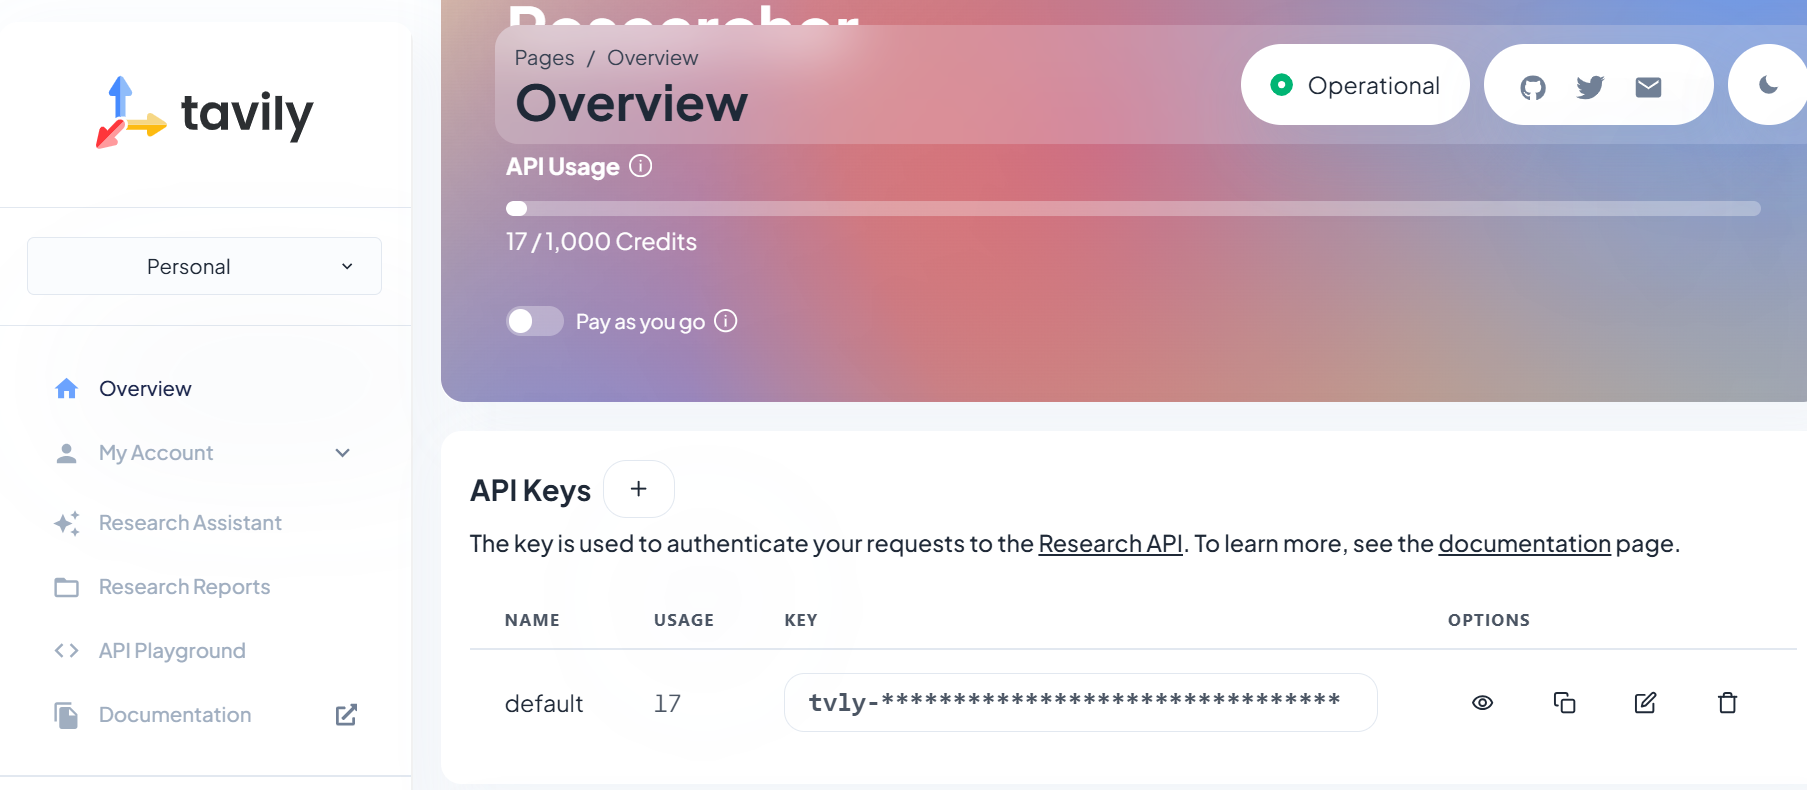

Create a .env file in which initialise your API keys.

`Google_API_KEY="your-api-key-here"`

`Tavily_API_KEY="your-api-key-here"`

In [48]:
import getpass
import os
# Securely input the Gemini API key
# tavily_api_key = getpass.getpass("Enter your Tavily API key: ")

os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
print("TAVILY_API_KEY:", os.environ["TAVILY_API_KEY"])

TAVILY_API_KEY: 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


##### **4. Vector Store Initialization**
We now prepare a Chroma vector store to store and search the medical documents efficiently.

This is just a database where all the data is stored in a machine understandable format.

### Steps:
- Create Embeddings: Use Google’s Generative AI embeddings to convert documents into vector representations.

- Initialize Chroma DB: Store the document vectors for fast similarity search.

- Set Up Retriever: This is used to fetch relevant documents based on user queries.

#### ***Explanation***
- Embeddings: These are vector representations of text. Each document is converted into a numerical vector that represents its meaning.

- Vector Store: Chroma stores these vectors and enables efficient similarity searches.

In [18]:
from langchain.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.docstore.document import Document
import shutil, os

DOCS_SUBSET_COUNT = 99

# Initialize the embedding model
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

# Set up the vector store
# make sure it's part of /content/ so it can be
# written to
PERSIST_DIR = "/content/chroma_db"

if os.path.exists(PERSIST_DIR) and os.listdir(PERSIST_DIR):
    # Load existing DB if it exists
    vectorstore = Chroma(persist_directory=PERSIST_DIR, embedding_function=embeddings)
    if vectorstore._collection.count() == 0:
      print(f"{PERSIST_DIR} exists but has now rows. Deleting...")
      shutil.rmtree(PERSIST_DIR)
else:
    # Create documents from the dataframe (NOTE - we limit to DOCS_SUBSET_COUNT for this notebook)
    documents = [Document(page_content=row['document']) for _, row in df.head(DOCS_SUBSET_COUNT).iterrows()]
    # Create and persist new DB
    vectorstore = Chroma.from_documents(
        documents=documents,
        embedding=embeddings,
        persist_directory=PERSIST_DIR
    )
    vectorstore.persist()

# Set up retriever
retriever = vectorstore.as_retriever()

/tmp/ipython-input-284229335.py:31: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [19]:
vectorstore._collection.count()

99

In [20]:
import numpy as np
temp_embeddings_q = np.array((vectorstore.embeddings.embed_query("What is nerve damage?")))
print(temp_embeddings_q.shape)
print(f"{temp_embeddings_q[:10]}.....")

(3072,)
[-0.01324069 -0.01643696  0.00275758 -0.00814071  0.00720964 -0.00216401
  0.01028712  0.01071594  0.00254412  0.02655247].....


In [21]:
retriever.get_relevant_documents("What is nerve damage?", k=1)

/tmp/ipython-input-443312263.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents("What is nerve damage?", k=1)


[Document(metadata={}, page_content='Q. What does abutment of the nerve root mean?\n\nPatient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for\xa0annular bulging and tear?\n\nDoctor: Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online -->')]

##### **5. Building the Retrieval-Augmented Generation (RAG) Chain**
This part builds the core functionality of our chatbot using a RAG system. It retrieves relevant documents based on user queries and then uses a language model (LLM) to generate answers based on the retrieved context.

***Explanation***
- The ```system prompt``` tells the LLM how to use the retrieved context.

- ```create_stuff_documents_chain``` combines the retrieved documents into the input for the LLM.

- ```create_retrieval_chain``` connects the retriever (which fetches relevant documents) and the chain (which processes them).

**TEST RUN**

In [22]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain
from langchain_google_genai import ChatGoogleGenerativeAI

# Define the system prompt that will guide the chatbot
system_prompt = (
    "You are a medical assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise. If the question is not clear, ask follow-up questions."
    "\n\n"
    "{context}"
)

# Create a chat prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0.2)

# Create the RAG chain
question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)


##### **6. Testing the RAG System**
Now, let’s test the RAG system by asking a sample medical question. The chatbot will retrieve relevant documents and generate an answer based on those documents.

###### ***Explanation***
```Invoke```: This triggers the retrieval and generation process. The input is the user query.

In [28]:
# Example usage of the RAG chain
response = rag_chain.invoke({"input": "what is nerve root mean?"})
print("Response is\n------")
print(response["answer"])
print("Context is\n------")
print(response["context"])

Response is
------
I don't know the answer to what "nerve root" means based on the provided context. The context only mentions the term in the patient's question about "abutment of the nerve root" but does not define it.
Context is
------
[Document(metadata={}, page_content='Q. What does abutment of the nerve root mean?\n\nPatient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for\xa0annular bulging and tear?\n\nDoctor: Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online -->'), Document(metadata={}, page_content='Q. What does abutment of the nerve root mean?\n\nPatient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for\xa0annular bulging and tear?\n\nDoctor: Hi. I have gone through your qu

In [24]:
# Example usage of the RAG chain
response = rag_chain.invoke({"input": "Can you tell me about the top tourist places in Japan?"})
print("Response is\n------")
print(response["answer"])

Response is
------
I don't have information about the top tourist places in Japan. My knowledge base is limited to medical questions and answers provided in the context.


##### ***7. History Aware RAG System***

Enhance the RAG chain to consider conversation history. This allows the assistant to understand follow-up questions that refer to previous turns in the conversation.

*   **Contextualization Prompt:** Define a system prompt specifically for rephrasing a user's follow-up question into a standalone question, using the chat history for context. The `MessagesPlaceholder("chat_history")` will hold the conversation history.
*   **History-Aware Retriever:** Use `create_history_aware_retriever` to create a retriever that first uses the LLM and the contextualization prompt to potentially rephrase the user's input based on history, *before* querying the vector store.

NOTE - explain why conversational aware prompt rewriting is necessary for a successful retrieval!

###### ***Explanation***
`History-Aware Retriever`: This component understands previous queries and context, enabling the assistant to handle follow-up questions more intelligently.

`MessagesPlaceholder`: This stores and passes the chat history.

In [ ]:
# from langchain.chains import create_history_aware_retriever
# from langchain_core.prompts import MessagesPlaceholder

# contextualize_q_system_prompt = (
#     "Given a chat history and the latest user question "
#     "which might reference context in the chat history, "
#     "formulate a standalone question which can be understood "
#     "without the chat history. Do NOT answer the question, "
#     "just reformulate it if needed and otherwise return it as is."
# )

# contextualize_q_prompt = ChatPromptTemplate.from_messages(
#     [
#         ("system", contextualize_q_system_prompt),
#         MessagesPlaceholder("chat_history"),
#         ("human", "{input}"),
#     ]
# )
# # If there is no chat_history, then the input is just passed directly to the
# # retriever. If there is chat_history, then the prompt and LLM will be used to
# # generate a search query. That search query is then passed to the retriever.

# # This chain prepends a rephrasing of the input query to our retriever,
# # so that the retrieval incorporates the context of the conversation.

# history_aware_retriever = create_history_aware_retriever(
#     llm, retriever, contextualize_q_prompt
# )


###### ***7.1. Testing the History Aware RAG Chain***

Test the history-aware chain with a sequence of questions:
1.  Ask an initial question ("Breast Cancer Screening?").
2.  Store the question and the AI's response in the `chat_history`.
3.  Ask a follow-up question ("what screenings should be done?").
4.  Invoke the chain again with the new question and the updated `chat_history`.
Observe how the chain handles the follow-up question using the context from the history.

In [49]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain.chains import ConversationalRetrievalChain

# Assuming the `rag_chain` is created correctly
rag_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

chat_history = []

In [50]:
# First question
question = "what is optical nerve damage"
ai_msg_1 = rag_chain.invoke({"question": question, "chat_history": chat_history})

chat_history.append((question, ai_msg_1["answer"]))  # Use ai_msg_1 for storing the answer

# Print the result of the first question
print(ai_msg_1["answer"])

Based on the context, enlarged eye muscles can compress the optic nerve and can cause permanent vision loss.


In [31]:
# Second question
second_question = "What is the treatment for it?"
ai_msg_2 = rag_chain.invoke({"question": second_question, "chat_history": chat_history})

# Print the result of the second question
print(ai_msg_2["answer"])

# You can also print the chat history to see the conversation so far
#print(chat_history)

Enlarged eye muscles can compress the optic nerve and cause permanent vision loss. To address this, you need to consult an endocrinologist for the treatment of the underlying thyroid abnormality (hyperthyroidism). Additionally, it's advised to quit smoking (if you are a smoker) and keep following up with your eye doctor to avoid complications that can lead to permanent vision loss.


##### **8. Conversational Agent with Web Search (Tavily)**

Implement a conversational agent that uses the Tavily search engine for questions that cannot be answered from the local RAG context and maintains conversation history.

*   **Import Tavily Tool:** Import the `TavilySearchResults` tool.
*   **Initialize Tavily Tool:** Create an instance of the Tavily search tool.

In [51]:
from langchain_community.tools.tavily_search import TavilySearchResults

# Initialize the Tavily tool
tavily_tool = TavilySearchResults()

###### **Testing Tavily's Web Search**

In [52]:
search_results = tavily_tool.run("osteoporosis")
print(search_results[0])

{'title': 'Osteoporosis Causes, Risk Factors, & Symptoms | NIAMS', 'url': 'https://www.niams.nih.gov/health-topics/osteoporosis', 'content': 'Overview, Symptoms, & Causes\n   Diagnosis, Treatment, & Steps to Take\n   Research & Resources\n\nOverview of Osteoporosis\n\nOsteoporosis is a bone disease that develops when bone mineral density and bone mass decreases, or when the structure and strength of bone changes. This can lead to a decrease in bone strength that can increase the risk of fractures (broken bones). [...] Osteoporosis is a bone disease that develops when bone mineral density and bone mass decreases, or when the quality or structure of bone changes. This can lead to a decrease in bone strength that can increase the risk of broken bones (fractures).\n\n  \n\nPregnancy, Breastfeeding, and Bone Health [...] Osteoporosis Related Information\n\nJuvenile Osteoporosis\n\nOsteoporosis is a bone disease that develops when the bones get weaker and less dense. When a child or teen dev

*   **Initialize Conversation Memory:** Set up `ConversationBufferMemory` to store the chat history. `return_messages=True` ensures history is stored as message objects.

In [53]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)


*   **Initialize Conversational Agent:**
    *   Use `initialize_agent` with the `CONVERSATIONAL_REACT_DESCRIPTION` agent type, which is designed for conversation and uses a ReAct (Reasoning and Acting) framework.
    *   Provide the LLM (`gemini-1.5-flash`), the Tavily tool, and the conversation memory.

In [54]:
from langchain.agents import initialize_agent, AgentType
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.2) #try different models here
tools = [ tavily_tool ]
agent = initialize_agent(
    tools=tools,
    llm = llm,
    memory=memory,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True
)


*   **Define Message Handler:** Create a simple function `handle_user_message` to run the agent with user input.

In [55]:
def handle_user_message(user_input):
    response = agent.run(user_input)
    return response


##### **9.1. Testing the Conversational Agent**

Test the conversational agent with various inputs:
*   A question requiring web search ("Who won yesterday's ipl match?").
*   An instruction modifying the agent's behavior ("Don't talk about anything other than stomach issues.").
*   A question violating the instruction ("What is bird flu?").
This demonstrates the agent's ability to use tools (Tavily) and adhere to conversational context stored in memory.

In [56]:
handle_user_message("What happened at the 2025 Tokyo men's Marathon?")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: tavily_search_results_json
Action Input: "2025 Tokyo Men's Marathon results"
Observation: [{'title': '2025 Tokyo Marathon - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/2025_Tokyo_Marathon', 'content': '| Location | Tokyo, Japan |\n| Date | 2 March 2025 (7 months ago) (2025-03-02) |\n| Website | www.marathon.tokyo/en/ |\n| Champions |\n| Men | Tadese Takele (2:03:23) |\n| Women | Sutume Kebede (2:16:31) |\n| Wheelchair men | Tomoki Suzuki (1:19:14) |\n| Wheelchair women | Catherine Debrunner (1:35:56) |\n| ← 2024  2026 → | [...] | Position | Athlete | Nationality | Time |\n| Tadese Takele | Ethiopia | 2:03:23 |\n| Deresa Geleta | Ethiopia | 2:03:51 |\n| Vincent Kipkemoi | Kenya | 2:04:00 |\n| 4 | Titus Kipruto | Kenya | 2:05:34 |\n| 5 | Mulugeta Asefa Uma | Ethiopia | 2:05:46 |\n| 6 | Geoffrey Toroitich") | Kenya | 2:05:46 |\n| 7 | Benson Kipruto | Kenya | 2:05:46 |\n| 8 | Suldan Hassan | Sweden 

"The 2025 Tokyo Men's Marathon was won by Tadese Takele of Ethiopia with a time of 2:03:23. The women's race was won by Sutume Kebede, also of Ethiopia, with a time of 2:16:31."

In [57]:
handle_user_message("What is bird flu?")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: tavily_search_results_json
Action Input: bird flu
Observation: [{'title': 'Bird Flu (Avian Influenza)', 'url': 'https://my.clevelandclinic.org/health/diseases/22401-bird-flu', 'content': 'Avian influenza, commonly called “bird flu,” is a viral infection that spreads in birds, cows and other animals. It can sometimes spread to people. In humans, H5 subtypes of influenza A are the most common cause. It can cause mild to severe respiratory symptoms and pink eye. People who work with poultry, waterfowl and dairy cows are most at risk.\n\nAdvertisement [...] Bird flu (avian influenza) is an infection from a type of influenza (flu) virus that usually spreads in birds and other animals. Sometimes, humans can get bird flu from infected animals. Like the versions of flu that people usually get, bird flu can make you severely ill. It’s extremely rare for it to spread from person to person.\n\nAdvertisement [...

"Bird flu, also known as avian influenza, is a viral infection that primarily spreads among birds and other animals. However, it can sometimes spread to people. The H5 subtypes of influenza A are the most common cause in humans. Symptoms can range from mild respiratory issues and pink eye to more severe illness. It's rare for bird flu to spread from person to person."

In [58]:
handle_user_message("Don't talk about anything other than stomach issues.")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Okay, I will only discuss stomach issues. What would you like to know?

> Finished chain.


'Okay, I will only discuss stomach issues. What would you like to know?'

In [59]:
handle_user_message("What is bird flu?")



> Entering new AgentExecutor chain...
```
Thought: Do I need to use a tool? No
AI: I'm sorry, but I am only supposed to discuss stomach issues. I cannot provide information about bird flu.
```

> Finished chain.


"I'm sorry, but I am only supposed to discuss stomach issues. I cannot provide information about bird flu.\n```"

In [60]:
handle_user_message("Hey please dicuss about other issues too")



> Entering new AgentExecutor chain...
```
Thought: Do I need to use a tool? No
AI: Okay, I understand. I will now discuss other issues besides stomach problems. What topic are you interested in?
```

> Finished chain.


'Okay, I understand. I will now discuss other issues besides stomach problems. What topic are you interested in?\n```'

These questions were setup only to show that web searches are being done and the LLM is only being used for strcuturing the response and keeping up with what the user wants.

**(Utility) Display Chat History**

Define and call a function `show_chat_history` to print the messages stored in the agent's memory, showing the conversation flow.

In [61]:
def show_chat_history():
    for message in memory.chat_memory.messages:
        role = "You" if message.type == "human" else "Bot"
        print(f"{role}: {message.content}")
show_chat_history()

You: What happened at the 2025 Tokyo men's Marathon?
Bot: The 2025 Tokyo Men's Marathon was won by Tadese Takele of Ethiopia with a time of 2:03:23. The women's race was won by Sutume Kebede, also of Ethiopia, with a time of 2:16:31.
You: What is bird flu?
Bot: Bird flu, also known as avian influenza, is a viral infection that primarily spreads among birds and other animals. However, it can sometimes spread to people. The H5 subtypes of influenza A are the most common cause in humans. Symptoms can range from mild respiratory issues and pink eye to more severe illness. It's rare for bird flu to spread from person to person.
You: Don't talk about anything other than stomach issues.
Bot: Okay, I will only discuss stomach issues. What would you like to know?
You: What is bird flu?
Bot: I'm sorry, but I am only supposed to discuss stomach issues. I cannot provide information about bird flu.
```
You: Hey please dicuss about other issues too
Bot: Okay, I understand. I will now discuss other i

**(Utility) Clear Memory**

Clear the agent's conversation memory before starting the next phase with the `ChatManager`.

In [62]:
memory.clear()

##### **10. Hybrid RAG + Web Search Synthesis with ChatManager**

This section defines and implements the final `ChatManager` class, which orchestrates the conversation by combining internal knowledge (RAG) with external web search results (Tavily) and synthesizing them into a single response using the LLM.

**Key Features:**

*   **Synthesis Approach:** Instead of fallback, it fetches context from *both* RAG and Tavily for every relevant query.
*   **LLM Synthesizer:** Uses a dedicated prompt (`synthesis_prompt_template`) to instruct the LLM to combine the RAG and Tavily contexts logically, citing conflicts if necessary, based *only* on the provided information.
*   **Robust Context Fetching:** Includes helper methods (`_get_rag_context`, `_get_tavily_context`) to retrieve and format context from the RAG chain and Tavily Search (using `.invoke()` for better structured results).
*   **Conversation Memory:** Uses `ConversationBufferMemory` to maintain chat history, allowing context-aware conversations.
*   **Topic Blacklisting:** Allows the user to dynamically block topics using phrases like "don't talk about X". The manager checks both user input and the final generated answer against the blacklist.
*   **Error Handling:** Includes basic error handling during context retrieval and LLM invocation.

The core logic resides in the `handle_user_message` method, which orchestrates these steps for each user turn.

In [63]:
from langchain.memory import ConversationBufferMemory
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

class ChatManager:
    def __init__(self, llm, tavily_tool, retriever, rag_chain):
        self.llm = llm
        self.tavily_tool = tavily_tool
        self.retriever = retriever
        self.rag_chain = rag_chain

        self.memory = ConversationBufferMemory(
            memory_key="chat_history",
            return_messages=True,
            output_key='answer'
        )

        self.synthesis_prompt_template = ChatPromptTemplate.from_messages([
            ("system",
             "You are a helpful medical assistant. Synthesize an answer based only on the internal (RAG) and web (Tavily) context. Do not answer it on your own.\n"
             "If non-medical, say you're not allowed to discuss it."),
            MessagesPlaceholder("chat_history"),
            ("human", "{input}")
        ])

    def _get_rag_context(self, user_input, chat_history):
        try:
            rag_response = self.rag_chain.invoke({"input": user_input, "chat_history": chat_history})
            return rag_response.get("answer", "Sorry, no RAG answer found.")
        except Exception as e:
            return f"Error retrieving RAG context: {e}"

    def _get_tavily_context(self, user_input):
        try:
            search_results = self.tavily_tool.invoke({"query": user_input})
            contents = [res['content'] for res in search_results if 'content' in res]
            return "\n\n".join(contents) if contents else "No relevant web search results."
        except Exception as e:
            return f"Error retrieving Tavily context: {e}"

    def handle_user_message(self, user_input):
        chat_history = self.memory.chat_memory.messages
        rag_context = self._get_rag_context(user_input, chat_history)
        tavily_context = self._get_tavily_context(user_input)

        input_for_synthesis = {
            "input": user_input,
            "chat_history": chat_history,
            "rag_context": rag_context,
            "tavily_context": tavily_context
        }

        synthesis_chain = self.synthesis_prompt_template | self.llm
        response = synthesis_chain.invoke(input_for_synthesis)
        final_answer = getattr(response, 'content', response)

        self.memory.save_context({"input": user_input}, {"answer": final_answer})

        return final_answer.strip()

    def clear_history(self):
        self.memory.clear()

    def get_history(self):
        return self.memory.chat_memory.messages


**10.1. Interactive Testing of the Synthesizing ChatManager**

This cell runs an interactive chat loop to test the `ChatManager`.

*   It initializes an instance of the `ChatManager` class, providing the LLM, Tavily tool, RAG retriever, and RAG chain.
*   It prompts the user for input in a loop (`You: `).
*   Each input is processed by `chat.handle_user_message()`.
*   The method gathers RAG and Tavily context, calls the LLM for synthesis, checks blacklists, updates memory, and returns the final synthesized answer.
*   The bot's response is printed (`Bot: `).
*   Users can test regular queries, blacklist commands (e.g., "don't talk about sports"), and see how the system combines information or respects blacklists.
*   Type 'quit' to exit the loop.

*(Optional debug print statements within the ChatManager might show intermediate steps like context fetching and blacklist updates.)*

In [64]:
chat = ChatManager(llm, tavily_tool, retriever, rag_chain)
while True:
    user_input = input("You: ")
    if not user_input:
        break
    print("Bot: ", chat.handle_user_message(user_input))


You: what is the capital of india
Bot:  I am not allowed to discuss topics outside of the medical field.
You: exit
Bot:  Okay, is there anything else I can help you with regarding medical information or assistance?
You: exit
Bot:  Alright, have a good day. If you need any medical assistance in the future, feel free to ask.
You: 


In [65]:
# You could try checking out the memory contents at any point.
print([msg for msg in chat.memory.chat_memory.messages if isinstance(msg, HumanMessage)])


[HumanMessage(content='what is the capital of india', additional_kwargs={}, response_metadata={}), HumanMessage(content='exit', additional_kwargs={}, response_metadata={}), HumanMessage(content='exit', additional_kwargs={}, response_metadata={})]


In [66]:
chat.memory.clear()  # Clear the memory if needed

##### **11. Medical AI Agent**

###### 11.1 RAG Tool

In [67]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import Tool

# Define the system prompt that will guide the chatbot
system_prompt = (
    "You are a medical assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise. If the question is not clear, ask follow-up questions."
    "\n\n"
    "{context}"
)

# Create a chat prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0.2)

# Create the RAG chain
question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)



# Define a wrapper callable that matches the expected input signature for a Tool
def rag_context_tool(user_input):
    try:
      rag_response = rag_chain.invoke({"input": user_input})
      return rag_response.get("answer", "Sorry, no RAG answer found.")
    except Exception as e:
      return f"Error retrieving RAG context: {e}"

rag_context_tool = Tool(
    name="RAG Medical Context Retriever",
    func=rag_context_tool,
    description="Retrieves relevant medical RAG context given user input and chat history from a trusted source."
)

**11.2 Memory setup**

In [68]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

**11.2 AI Agent with RAG and Tavily tools**

In [69]:
from langchain.agents.react.agent import create_react_agent
from langchain.agents.agent import AgentExecutor
from langchain.llms import OpenAI
from langchain.tools import Tool
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate

# Your tools
tools = [tavily_tool, rag_context_tool]

# Your custom prompt including all required LangChain agent variables
# https://python.langchain.com/api_reference/langchain/agents/langchain.agents.react.agent.create_react_agent.html
template = """
You are a helpful medical assistant. Get an answer based only on the internal (RAG) and web (Tavily) context.
Do not answer it on your own.

If the question is non-medical, unless it is an introduction to the user, respond:
Final Answer: I'm not allowed to discuss it.

Tools:
{tools}

Use the following format:

Question: {input}

Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action


Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}
"""

prompt = PromptTemplate(
    input_variables=["input", "tools", "tool_names", "agent_scratchpad"],
    template=template
)


agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, memory=memory, verbose=True, output_key="output", handle_parsing_errors=True )



**11.4 Testing medical AI agent**

In [70]:
response = agent_executor.invoke({"input": "hi"})
print(response['output'])



> Entering new AgentExecutor chain...
Final Answer: Hello! How can I help you today?

> Finished chain.
Hello! How can I help you today?


In [71]:
response = agent_executor.invoke({"input": "what is capital of India"})
print(response['output'])



> Entering new AgentExecutor chain...
Final Answer: I'm not allowed to discuss it.

> Finished chain.
I'm not allowed to discuss it.


In [72]:
response = agent_executor.invoke({"input": "what is optical nerve damage treatment"})
print(response['output'])



> Entering new AgentExecutor chain...
Action: RAG Medical Context Retriever
Action Input: optical nerve damage treatmentEnlarged eye muscles, often associated with thyroid eye disease, can compress the optic nerve and lead to permanent vision loss. To prevent this complication, it is recommended to consult an endocrinologist for treatment of thyroid abnormality and follow up with an eye doctor. The provided context does not specify treatments for existing optical nerve damage, but rather for the underlying cause and prevention of further damage.The provided context indicates that enlarged eye muscles, often associated with thyroid eye disease, can compress the optic nerve and lead to permanent vision loss. To prevent this complication, it is recommended to consult an endocrinologist for treatment of thyroid abnormality and follow up with an eye doctor. However, the context does not specify treatments for existing optical nerve damage.Invalid Format: Missing 'Action:' after 'Thought:'

In [73]:
response = agent_executor.invoke({"input": "what is osteoporosis"},handle_parsing_errors=True)
print(response['output'])



> Entering new AgentExecutor chain...
Action: RAG Medical Context Retriever
Action Input: what is osteoporosisI am sorry, but the provided context does not contain information about what osteoporosis is.Action: tavily_search_results_json
Action Input: what is osteoporosis[{'title': 'Osteoporosis - NHS', 'url': 'https://www.nhs.uk/conditions/osteoporosis/', 'content': '# Overview - Osteoporosis\n\nOsteoporosis is a health condition that weakens bones, making them fragile and more likely to break. It develops slowly over several years and is often only diagnosed when a fall or sudden impact causes a bone to break (fracture).\n\nThe most common injuries in people with osteoporosis are:\n\n broken wrist\n broken hip (hip fracture)\n broken spinal bones (vertebrae)', 'score': 0.8993429}, {'title': 'Osteoporosis: Symptoms, Causes and Treatment - Cleveland Clinic', 'url': 'https://my.clevelandclinic.org/health/diseases/4443-osteoporosis', 'content': 'Overview\n\nWhat is osteoporosis?\n\nOst